# Natural Language Processing Hands On

*For this hands-on, you will be using Alice's Adventures in Wonderland by Lewis Carroll to practice your newfound NLP skills. The book can be found here. Follow the process you used on The Count of Monte Cristo to create a graphic of the most frequently used words in Alice's Adventures in Wonderland.*

*Please attach a Jupyter Notebook with your code, your graphic, and your conclusions.*

In [1]:
pip install bs4

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'

Using legacy 'setup.py install' for bs4, since package 'wheel' is not installed.
  Running setup.py install for bs4: started
  Running setup.py install for bs4: finished with status 'done'


In [4]:
pip install nltk

     ---------------------------------------- 1.5/1.5 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 78.4/78.4 KB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 KB 2.8 MB/s eta 0:00:00
     -------------------------------------- 274.4/274.4 KB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
import requests
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sdstc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [38]:
url = 'https://www.gutenberg.org/files/11/11-h/11-h.htm'

In [39]:
r = requests.get(url)

In [40]:
type(r)

requests.models.Response

In [41]:
html = r.text
soup = BeautifulSoup(html, "html.parser")
type(soup)

bs4.BeautifulSoup

In [42]:
soup.title.string

'The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll'

In [43]:
text = soup.get_text()
tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)
tokens[:10]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Alice',
 's',
 'Adventures',
 'in',
 'Wonderland']

In [44]:
words = []
for word in tokens:
    words.append(word.lower())

In [45]:
words[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'alice',
 's',
 'adventures',
 'in',
 'wonderland']

In [46]:
stopwords = nltk.corpus.stopwords.words('english')

In [47]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [48]:
wordsWithoutStops = []
for word in words:
    if word not in stopwords:
        wordsWithoutStops.append(word)

In [51]:
wordsWithoutStops[:8]

['project',
 'gutenberg',
 'ebook',
 'alice',
 'adventures',
 'wonderland',
 'lewis',
 'carroll']

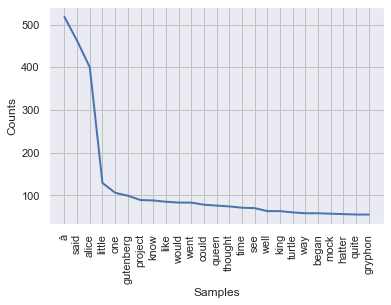

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:
sns.set()
frequencyDis = nltk.FreqDist(wordsWithoutStops)
frequencyDis.plot(25)

In the top 25 words of the ebook, Alice in Wonderland, this graph depicts that there have been over 500 instances of the word 'a', followed by a steady decline when words such as 'said', 'alice', and 'little' were used. Though there were 400 instances of the protagonist's name (Alice), a huge drop soon followed when the word 'little' was later measured. A smaller decline followed when the word 'one' was measured which steadily and slowly continued down the list of top used words in Alice in Wonderland. The least used word in the list of top 25 words from this ebook was 'gryphon'.